In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import tensorboard
tfk = tf.keras
tfkl = tf.keras.layers
tfpl = tfp.layers
tfd = tfp.distributions

2023-01-18 15:42:41.386351: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import tensorflow as tf
if tf.test.gpu_device_name() != '/device:GPU:0':
  print('WARNING: GPU device not found.')
else:
  print('SUCCESS: Found GPU: {}'.format(tf.test.gpu_device_name()))

SUCCESS: Found GPU: /device:GPU:0


2022-11-03 12:34:53.120917: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-03 12:34:53.121587: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-03 12:34:53.125007: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-11-03 12:34:53.155509: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:3b:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.635GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-11-03 12:34:53.155556: I tensorflow/stream_executor/platf

/tmp/ipykernel_102476/3810096837.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Z)


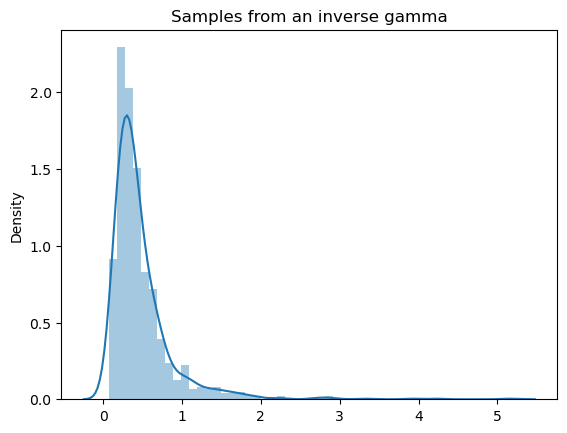

In [4]:
Z = tfd.InverseGamma(3,1).sample(1000,1)
sns.distplot(Z)
plt.title("Samples from an inverse gamma")
plt.show()



In [6]:
U = tfd.Gamma(8,1).sample(1000)
sns.distplot(U)
plt.title("Samples from an inverse gamma")
plt.show()

NotImplementedError: Cannot convert a symbolic Tensor (gradients/stateless_random_gamma/StatelessRandomGammaV2_grad/sub:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

(1000,)


/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



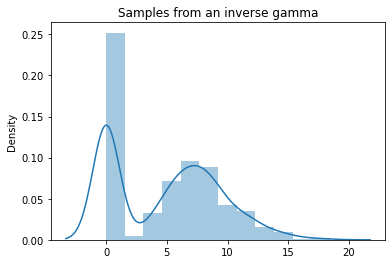

In [48]:
def esc_alpha(x):
    if x<0.3:
        return 0.5
    else :
        return 8
    

def esc_beta(x):
    if x<0.3:
        return 50
    else :
        return 1

alpha_beta = np.zeros((1000,2))
alpha_beta[...,0] = tf.map_fn(esc_alpha,Z)
alpha_beta[...,1] = tf.map_fn(esc_beta, Z)

X_new = tfd.Gamma(alpha_beta[...,0],alpha_beta[...,1]).sample()
print(X_new.shape)
sns.distplot(X_new)
plt.title("Samples from an inverse gamma")
plt.show()


/tmp/ipykernel_93760/3053886004.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_sort)


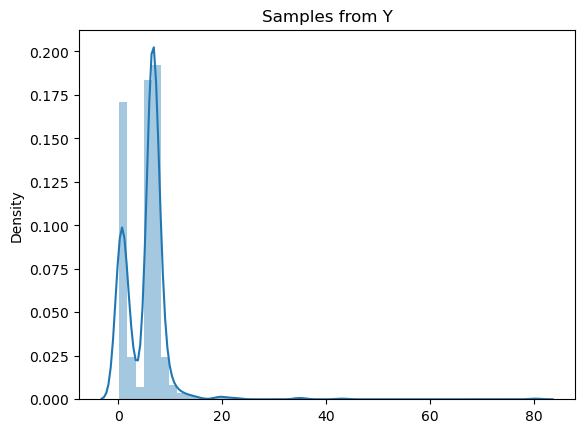

In [6]:
Ber = tfd.Bernoulli(probs=0.3, dtype ='float').sample(1000) 
IG1 = tfd.InverseGamma(concentration =1.8, scale = 1 ).sample(1000)
IG2 = tfd.InverseGamma(concentration =1.8, scale = 1 ).sample(1000)
Y = IG1*Ber +(6+IG2)*(1-Ber)

Y_sort=tf.sort(Y)
sns.distplot(Y_sort)
plt.title("Samples from Y")
plt.show()
train_dataset = Y[:250]
train_dataset = tf.reshape(train_dataset,[250,1])
eval_dataset = Y[250:]
eval_dataset = tf.reshape(eval_dataset,[750,1])

In [75]:
encoded_size = 1
input_shape =(1,)
nbparamsl = 2
nbparamsobs = 2


In [76]:
prior = tfd.InverseGamma(concentration =3, scale = 1 )

In [77]:
encoder3 = tfk.Sequential([
    tfkl.InputLayer(input_shape=[1]),
    tfkl.Dense(4,
               activation='relu'),
    tfkl.Dense(8,
               activation='relu'),
    tfkl.Dense(8,
               activation='relu'),
    tfkl.Dense(2,
               activation=None,
              name = 'inv_gamma_beta_posterior'),
    tfkl.Lambda(lambda x: tf.abs(x)+0.001),
])    


In [78]:
encoder3.add( tfpl.DistributionLambda(
    make_distribution_fn=lambda t: tfd.Normal(
        loc=t[...,0], scale=t[...,1]),
    activity_regularizer=tfpl.KLDivergenceRegularizer(prior)))
encoder3.add(tfkl.Reshape(target_shape=[1]))


In [79]:
encoder3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 4)                 8         
                                                                 
 dense_41 (Dense)            (None, 8)                 40        
                                                                 
 dense_42 (Dense)            (None, 8)                 72        
                                                                 
 inv_gamma_beta_posterior (D  (None, 2)                18        
 ense)                                                           
                                                                 
 lambda_10 (Lambda)          (None, 2)                 0         
                                                                 
 distribution_lambda_5 (Dist  ((None,),                0         
 ributionLambda)              (None,))               

In [80]:
decoder3 = tfk.Sequential([
    tfkl.InputLayer(input_shape=[1]),
    tfkl.Dense(4, use_bias=True, activation='relu'),
    tfkl.Dense(8, use_bias=True, activation='relu'),
    tfkl.Dense(8, use_bias=True, activation='relu'),
    tfkl.Dense(4, use_bias=True),
    tfkl.Lambda(lambda x: tf.abs(x)+0.001),
])

In [81]:
decoder3.add(tfkl.Dense(tfpl.IndependentNormal.params_size(1)))
decoder3.add(tfpl.IndependentNormal(1))


In [82]:
vae3 = tfk.Model(inputs=encoder3.inputs,
                outputs=decoder3(encoder3.outputs))

In [88]:
negative_log_likelihood = lambda x, rv_x: -rv_x.log_prob(x)

vae3.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-4),
            loss=negative_log_likelihood)

In [91]:
vae3.fit(train_dataset,train_dataset,batch_size=16,epochs=100)

Epoch 1/100
16/16 [==============================] - 0s 5ms/step - loss: 3.9019
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 3.9784
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 3.7832
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 3.7688
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 4.0504
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 3.7335
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 4.0603
Epoch 8/100
16/16 [==============================] - 0s 5ms/step - loss: 4.0039
Epoch 9/100
16/16 [==============================] - 0s 5ms/step - loss: 3.8970
Epoch 10/100
16/16 [==============================] - 0s 7ms/step - loss: 4.0519
Epoch 11/100
16/16 [==============================] - 0s 6ms/step - loss: 3.8722
Epoch 12/100
16/16 [==============================] - 0s 6ms/step - loss: 4.2319
Epoch 13/100
16/16 [=================

/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.
/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


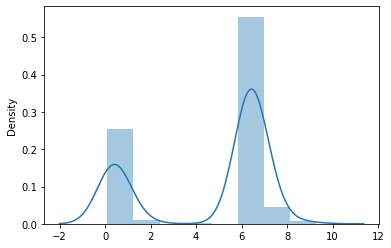

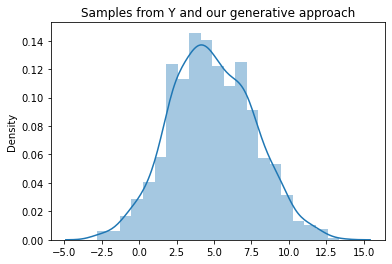

/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if sys.path[0] == '':


<Figure size 432x288 with 0 Axes>

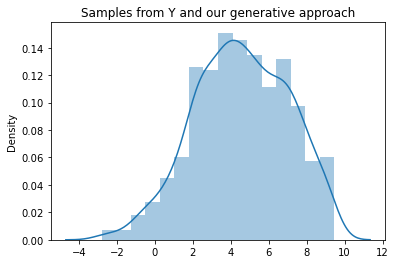

In [90]:
samples_y = Y
X_gen = prior.sample((1000))
samples_y_gen = tf.reshape(decoder3(X_gen),(1000,))
sns.distplot(samples_y)
plt.figure()
sns.distplot(samples_y_gen)
plt.title("Samples from Y and our generative approach")
plt.show()
plt.figure()
samples_y_gen_sort = tf.sort(samples_y_gen)
plt.figure()
sns.distplot(samples_y_gen_sort[:950])
plt.title("Samples from Y and our generative approach")
plt.show()

In [116]:
zeros_traindataset=tf.zeros(train_dataset.shape)

In [117]:
Y_input = tfk.Input(
    shape=[1], name="Y_train"
)  
zeros_input = tfk.Input([1], name="Zeros_train")
dist = tfkl.Dense(4, use_bias=True, activation='relu')(Y_input)
dist = tfkl.Dense(8, use_bias=True, activation='relu')(dist)
dist = tfkl.Dense(8, use_bias=True, activation='relu')(dist)
dist = tfkl.Dense(2, use_bias=True)(dist)
dist = tfkl.Lambda(lambda x: tf.abs(x)+0.001)(dist)
prior = tfkl.Dense(2,use_bias=True,activation=None, bias_initializer=tfk.initializers.Ones()
)(zeros_input)
prior = tfkl.Lambda(lambda x: tf.abs(x)+0.001)(prior)
#prior = tfpl.DistributionLambda(
 #   make_distribution_fn=lambda t: tfd.InverseGamma(
  #      concentration=t[... , 0], scale=t[...,1])
#)(prior)
prior = tfd.InverseGamma(concentration=prior[... , 0], scale = prior[..., 0])

posterior = tfpl.DistributionLambda(
    make_distribution_fn=lambda t: tfd.InverseGamma(
        concentration=t[... , 0], scale=t[...,1]),
    activity_regularizer=tfpl.KLDivergenceRegularizer(prior)
)(dist)
posterior = tfkl.Reshape(target_shape=[1])(posterior) 
print(posterior.shape)
encoder2 = tfk.Model(
    inputs=[Y_input,zeros_input],
    outputs=[posterior],
)

(None, 1)


In [118]:
encoder2.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Y_train (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_93 (Dense)               (None, 4)            8           ['Y_train[0][0]']                
                                                                                                  
 dense_94 (Dense)               (None, 8)            40          ['dense_93[0][0]']               
                                                                                                  
 dense_95 (Dense)               (None, 8)            72          ['dense_94[0][0]']               
                                                                                           

In [119]:
decoder2 = tfk.Sequential([
    tfkl.InputLayer(input_shape=[1]),
    tfkl.Dense(4, use_bias=True, activation='relu'),
    tfkl.Dense(8, use_bias=True, activation='relu'),
    tfkl.Dense(8, use_bias=True, activation='relu'),
    tfkl.Dense(4, use_bias=True),
    tfkl.Lambda(lambda x: tf.abs(x)+0.001),
])

In [120]:
decoder2.add(tfkl.Dense(tfpl.IndependentNormal.params_size(1)))
decoder2.add(tfpl.IndependentNormal(1))


In [121]:
decoder2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 4)                 8         
                                                                 
 dense_99 (Dense)            (None, 8)                 40        
                                                                 
 dense_100 (Dense)           (None, 8)                 72        
                                                                 
 dense_101 (Dense)           (None, 4)                 36        
                                                                 
 lambda_30 (Lambda)          (None, 4)                 0         
                                                                 
 dense_102 (Dense)           (None, 2)                 10        
                                                                 
 independent_normal_7 (Indep  ((None, 1),            

In [122]:
vae2 = tfk.Model(inputs=encoder2.inputs,
                outputs=decoder2(encoder2.outputs))

In [123]:
negative_log_likelihood = lambda x, rv_x: -rv_x.log_prob(x)

vae2.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-4),
            loss=negative_log_likelihood)

In [124]:
vae2.fit(
    {"Y_train" : train_dataset, "Zeros_train" : zeros_traindataset},
    train_dataset,
    validation_data = ((eval_dataset,tf.zeros(eval_dataset.shape)),eval_dataset),
         batch_size=16,epochs=100)


Epoch 1/100


TypeError: in user code:

    File "/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/keras/engine/training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/keras/engine/training.py", line 949, in compute_loss
        y, y_pred, sample_weight, regularization_losses=self.losses)
    File "/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/keras/engine/compile_utils.py", line 240, in __call__
        total_loss_metric_value, sample_weight=batch_dim)
    File "/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/keras/utils/metrics_utils.py", line 70, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/keras/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/keras/metrics/base_metric.py", line 450, in update_state  **
        sample_weight, values)
    File "/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/keras/engine/keras_tensor.py", line 255, in __array__
        f'You are passing {self}, an intermediate Keras symbolic input/output, '

    TypeError: You are passing KerasTensor(type_spec=TensorSpec(shape=(), dtype=tf.float32, name=None), name='Placeholder:0', description="created by layer 'tf.cast_3'"), an intermediate Keras symbolic input/output, to a TF API that does not allow registering custom dispatchers, such as `tf.cond`, `tf.function`, gradient tapes, or `tf.map_fn`. Keras Functional model construction only supports TF API calls that *do* support dispatching, such as `tf.math.add` or `tf.reshape`. Other APIs cannot be called directly on symbolic Kerasinputs/outputs. You can work around this limitation by putting the operation in a custom Keras layer `call` and calling that layer on this symbolic input/output.


In [9]:
alpha = [1., 1,2,2,2]
dist = tfd.Dirichlet(alpha)

Diri2 = tfd.Dirichlet([2,2,1,1,1])

print(Diri2.log_prob([0.5,0.5,0,0,0]))

tf.Tensor(5.192957, shape=(), dtype=float32)


In [72]:
import ot
def T(X,Y,n):
    MX = ot.dist(X,X,'sqeuclidean')
    MY = ot.dist(Y,Y,'sqeuclidean')
    T1 = (1/n**2)*np.sum(MX*MY)
    print(T1)
    T2 = (2/n**3)*np.sum(MX@MY)
    print(T2)
    T3 = (1/n**4)*np.sum(np.tensordot(MX,MY,axes=0))
    print(T3)
    return T1-T2+T3
    

In [115]:

mu1 = 0
sig1 = 2
mu2 = 0
sig2=1
n1 = 10
n2 = 10
d=5

mvn1 = tfd.MultivariateNormalDiag(
    loc=[mu1],
scale_diag=[sig1])
mvn2 = tfd.MultivariateNormalDiag(
    loc=[mu2],
scale_diag=[sig2])


s1 = mvn1.sample([n1,d])
s2 = mvn2.sample([n2,d])

s1 = tf.reshape(s1,(n1,d)).numpy()
s2=tf.reshape(s2,(n2,d)).numpy()
a, b = np.ones((n1,)) / n1, np.ones((n2,)) / n2 

In [116]:
Ms1 = ot.dist(s1,s1,'sqeuclidean')
Ms2 = ot.dist(s2,s2,'sqeuclidean')
U = np.tensordot(Ms1, Ms2, axes=0)
print(U.shape)
print(np.sum(U))
c = 0
for i in range(10):
    for j in range(10):
        c+=np.sum(Ms1[i,j]*Ms2)
print(c/(10**4))      

(10, 10, 10, 10)
3909761.2
390.97615205078125


In [117]:
from datetime import datetime
start=datetime.now()
print(T(s1,s2,10))
print(datetime.now()-start)

#Statements



452.4153515625
796.2014375
390.976125
47.190039062500034
0:00:00.009921


In [118]:
from statsmodels.distributions.empirical_distribution import ECDF

In [141]:
def tail_mod(f,n,x):
    return((n/n+1)*(f(x))+1/(n+1))

def L(X,Y,u):
    Nn = np.sum(X>u)
    m=Y.shape[0]
    fY=ECDF(Y[:,0])
    Xmax = np.maximum(X,u)
    Xu = np.minimum(Xmax,u)
    res = 1 + 1/Nn*(np.sum(np.log(tail_mod(fY,m,Xmax)/tail_mod(fY,m,Xu))))
    return(res)

def KLu(X,Y,u):
    return (-L(X,Y,u)-L(Y,X,u))
    

In [142]:
U = mvn1.sample(100)
print(U.shape)
V=mvn2.sample(100)

(100, 1)


In [143]:
f = ECDF(U[:,0])
print(f([0]))
print(tail_mod(f,100,0))

[0.51]
1.02990099009901


In [146]:
print(L(U,V,1))
print(KLu(U,V,1))

1.1221948683002871
-2.192934430676925


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

[0.65983132 1.50076176 1.59115817 0.27775383 0.5077529  0.06202301
 0.9839488  0.95484596 1.15179295 1.45840271 1.93456741 1.9638443
 1.80364892 0.10772214 1.01307057 0.88137972 0.96054553 0.13318956
 1.22826603 0.42344816 1.48274824 0.43472965 0.94998859 0.15179545
 0.80723373 1.25307932 0.54172163 1.74197801 0.95045517 1.14322014]


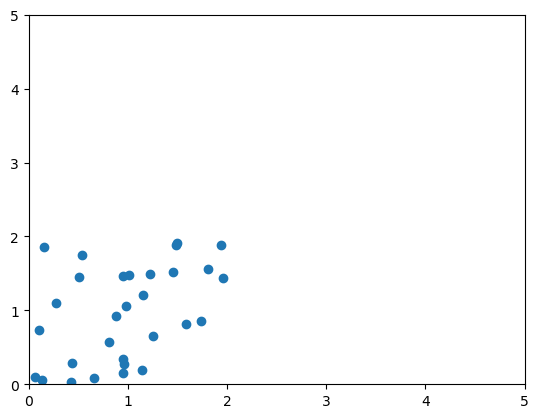

In [13]:
U = np.random.uniform(0,2,30)
Y = np.random.uniform(0,2,30)
print(U)
plt.xlim(0, 5)
plt.ylim(0,5)
plt.scatter(U,Y)

In [2]:
import tensorflow as tf
import tensorflow_probability as tfp
import Prob_models as PM
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import tensorboard
tfk = tf.keras
tfkl = tf.keras.layers
tfpl = tfp.layers
tfd = tfp.distributions
import random
from netCDF4 import Dataset


In [3]:
negative_log_likelihood = lambda x, rv_x: -rv_x.log_prob(x)
seed = 100
random.seed(seed)
tf.random.set_seed(seed)
np.random.seed(seed)

In [4]:
ncfile = Dataset('/home/nlafon/These/4Dvarnetstochastic/Danube_river_network/Dataset_danube.nc',"r")
L=[]
for i in range(31):
    L.append(ncfile['S'+str(i+1)][:].reshape(18244,1))
        
dataset = np.concatenate((L[0],L[1],L[2],L[3],L[4],L[5],L[6],L[7],L[8],L[9],L[10],L[11],L[12],L[13],L[14],L[15],L[16],L[17],L[18],L[19],L[20],L[21],L[22],L[23],L[24],L[25],L[26],L[27],L[28],L[29],L[30]),axis=1)
print(dataset.shape)
R4 = dataset[:,22:27]
train_dataset = R4[::25,:]/10
eval_dataset  = R4/10


(18244, 31)


In [5]:
class Sphere_Encoder(tfk.Model):
    
    def __init__(self):      
        super(Sphere_Encoder,self).__init__()
        self.encoded_size = 4
        self.prior        =  tfd.Independent(tfd.Normal(loc=tf.zeros(self.encoded_size), scale=1),
                                reinterpreted_batch_ndims=1)
        self.concat       = tfkl.Concatenate()
        self.dense1       = tfkl.Dense(8,activation='relu')
        self.dense2       = tfkl.Dense(8,activation='relu')
        self.lambda1      = tfkl.Lambda(lambda x: tf.abs(x)+0.001)
        self.dense3       = tfkl.Dense(tfpl.IndependentNormal.params_size(self.encoded_size))
        self.ind_norm1    = tfpl.IndependentNormal(self.encoded_size,
                                                   activity_regularizer=tfpl.KLDivergenceRegularizer(self.prior,
                                                                                                     weight=1.0))
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.lambda1(x)
        x = self.dense3(x)
        x = self.ind_norm1(x)
        return x
    

class Sphere_Decoder(tfk.Model):
    def __init__(self):
        super(Sphere_Decoder,self).__init__()
        self.K          = 5
        self.dense1     = tfkl.Dense(5, use_bias=True, activation='relu')
        self.dense2     = tfkl.Dense(10, use_bias=True, activation='relu')
        self.dense31    = tfkl.Dense(tfpl.IndependentNormal(self.K).params_size(self.K))        
        self.ind_norm11 = tfpl.IndependentNormal(self.K)
        self.dense32    = tfkl.Dense(5,activation = 'relu', bias_initializer =
                                     tfk.initializers.RandomUniform(minval=2, maxval=3))
        #self.lambda12   = tfkl.Lambda(lambda x: tf.abs(x),activation='softmax')
        self.concat     = tfkl.Concatenate()
        self.lambda1    = tfkl.Lambda(lambda x : 1/(1+x))
        
        self.diri12 = tfpl.DistributionLambda(
                            make_distribution_fn=lambda c: tfd.Dirichlet(
                                c))
        
    def call(self, inputs):
        x               = self.dense1(inputs)
        x               = self.dense2(x)
        #normal without forcing mu to be on the sphere
        x               = self.dense31(x)
        x               = self.ind_norm11(x)
        #dirichlet output 
        #x               = self.dense32(x)
        #x = self.lambda12(x)
        #x = self.diri12(x)
        return x
    
class Sphere_VAE(tfk.Model):
    def __init__(self):      
        super(Sphere_VAE,self).__init__()
        self.encoder = Sphere_Encoder()
        self.decoder = Sphere_Decoder()
    
    def call(self,inputs):
        return self.decoder(self.encoder(inputs))
vae = Sphere_VAE()

2023-01-18 15:43:05.577545: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-18 15:43:05.580656: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 16. Tune using inter_op_parallelism_threads for best performance.


In [6]:
checkpoint_filepath = '/home/nlafon/These/Extreme_VAE/tmp/Danube/Std_VAE/checkpoint'
metric ='val_loss'
model_checkpoint_callback = tfk.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor=metric,
    mode='min',
    save_best_only=True)
vae.load_weights(checkpoint_filepath)

In [7]:
negative_log_likelihood = lambda x, rv_x: -rv_x.log_prob(x)

vae.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-3),
            loss=negative_log_likelihood)

In [8]:
vae.fit(train_dataset,train_dataset, 
        validation_data=(eval_dataset,eval_dataset), 
        batch_size=32,
        epochs=1000, 
        callbacks = [model_checkpoint_callback]
       )

Epoch 1/1000
23/23 [==============================] - 3s 73ms/step - loss: 7.9664 - val_loss: 8.4709
Epoch 2/1000
23/23 [==============================] - 1s 52ms/step - loss: 7.9531 - val_loss: 8.5011
Epoch 3/1000
23/23 [==============================] - 1s 60ms/step - loss: 8.0000 - val_loss: 8.4620
Epoch 4/1000
23/23 [==============================] - 1s 59ms/step - loss: 7.9707 - val_loss: 8.4871
Epoch 5/1000
23/23 [==============================] - 1s 56ms/step - loss: 7.9617 - val_loss: 8.4679
Epoch 6/1000
23/23 [==============================] - 1s 31ms/step - loss: 7.9749 - val_loss: 8.5775
Epoch 7/1000
23/23 [==============================] - 1s 51ms/step - loss: 8.0430 - val_loss: 8.4786
Epoch 8/1000
23/23 [==============================] - 1s 57ms/step - loss: 7.9717 - val_loss: 8.5094
Epoch 9/1000
23/23 [==============================] - 1s 61ms/step - loss: 8.0272 - val_loss: 8.4573
Epoch 10/1000
23/23 [==============================] - 1s 54ms/step - loss: 8.0064 - val_lo

In [9]:
tfd.Normal(loc=tf.zeros(4), scale=1)

<tfp.distributions.Normal 'Normal' batch_shape=[4] event_shape=[] dtype=float32>

In [29]:
R4_23 = np.sort(R4[:,0])
R4_24 = np.sort(R4[:,1])
R4_25 = np.sort(R4[:,2])
R4_26 = np.sort(R4[:,3])
R4_27 = np.sort(R4[:,4])

q = 0.9
n = int(q*18244)

print(R4_23[n])
print(R4_24[n])
print(R4_25[n])
print(R4_26[n])
print(R4_27[n])

U1 = R4[:,0]>R4_23[n]
U2 = R4[:,1]>R4_24[n]
U3 = R4[:,2]>R4_25[n]
U4 = R4[:,3]>R4_26[n]
U5 = R4[:,4]>R4_27[n]
print(np.sum(U1*U2)/18244)
print(np.sum(U1*U3)/18244)
print(np.sum(U1*U4)/18244)
print(np.sum(U1*U5)/18244)
print(np.sum(U2*U3)/18244)

print(np.sum(U2*U4)/18244)
print(np.sum(U2*U5)/18244)
print(np.sum(U3*U4)/18244)
print(np.sum(U5*U3)/18244)
print(np.sum(U5*U4)/18244)

print(np.sum(U1*U2*U3)/18244)
print(np.sum(U1*U2*U3*U4)/18244)
print(np.sum(U2*U3*U4*U5)/18244)
print(np.sum(U1*U2*U3*U4*U5)/18244)
#print(np.count_nonzero(R4[:,0]>R4_23[n] & R4[:,1]>R4_24[n]))

train_dataset = R4[::25,:]
print(train_dataset.shape)


U1 = train_dataset[:,0]>R4_23[n]
U2 = train_dataset[:,1]>R4_24[n]
U3 = train_dataset[:,2]>R4_25[n]
U4 = train_dataset[:,3]>R4_26[n]
U5 = train_dataset[:,4]>R4_27[n]
print(np.sum(U1*U2)/730)
print(np.sum(U1*U3)/730)
print(np.sum(U1*U4)/730)
print(np.sum(U1*U5)/730)
print(np.sum(U2*U3)/730)
print(np.sum(U2*U4)/730)
print(np.sum(U2*U5)/730)
print(np.sum(U3*U4)/730)
print(np.sum(U5*U3)/730)
print(np.sum(U5*U4)/730)

print(np.sum(U1*U2*U3)/730)
print(np.sum(U1*U2*U3*U4)/730)
print(np.sum(U2*U3*U4*U5)/730)
print(np.sum(U1*U2*U3*U4*U5)/730)

96.5
78.6
69.0
62.1
47.6
0.09531900898925674
0.0676386757290068
0.0629796097347073
0.05470291602718702
0.06851567638675729
0.0639662354746766
0.05574435430826573
0.08726156544617408
0.07229774172330629
0.08167068625301468
0.06643279982459988
0.05985529489147117
0.05207191405393554
0.05064678798509099
(730, 5)
0.08493150684931507
0.06027397260273973
0.05342465753424658
0.04246575342465753
0.06027397260273973
0.052054794520547946
0.04246575342465753
0.0684931506849315
0.052054794520547946
0.06301369863013699
0.0589041095890411
0.049315068493150684
0.038356164383561646
0.038356164383561646


In [27]:
size = 18244

prior_samples = vae.encoder.prior.sample((size))
print(prior_samples.shape)
angles_dist   = vae.decoder(prior_samples)
genD          = 10*angles_dist.sample().numpy()
print(genD.shape)

(18244, 4)
(18244, 5)


In [30]:
#Generated samples


U1 = genD[:,0]>R4_23[n]
U2 = genD[:,1]>R4_24[n]
U3 = genD[:,2]>R4_25[n]
U4 = genD[:,3]>R4_26[n]
U5 = genD[:,4]>R4_27[n]
print(np.sum(U1*U2)/18244)
print(np.sum(U1*U3)/18244)
print(np.sum(U2*U3)/18244)
print(np.sum(U2*U4)/18244)
print(np.sum(U2*U5)/18244)
print(np.sum(U3*U4)/18244)
print(np.sum(U5*U3)/18244)
print(np.sum(U5*U4)/18244)
print(np.sum(U1*U4)/18244)
print(np.sum(U1*U5)/18244)
print(np.sum(U1*U2*U3)/18244)
print(np.sum(U1*U2*U3*U4)/18244)
print(np.sum(U2*U3*U4*U5)/18244)
print(np.sum(U1*U2*U3*U4*U5)/18244)
#print(np.count_nonzero(R4[:,0]>R4_23[n] & R4[:,1]>R4_24[n]))

0.04889278666959
0.05777241832931375
0.05788204341153256
0.058868669151501865
0.05141416356062267
0.07026967770225828
0.06001973251479938
0.06084192063144048
0.058484981363736026
0.05141416356062267
0.03836877877658408
0.03316158737119053
0.034312650734488054
0.025487831615873712
